<a href="https://colab.research.google.com/github/Batek26/machine_learning_bootcamp/blob/main/Decission_tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set(font_scale=1.3)
np.random.seed(42)

Load data

In [9]:
raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = [name.replace(' ', '_')[:-5] for name in all_data['feature_names']]
target_names = all_data['target_names']

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca: {target_names}')

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


Eksploracja danych

In [12]:
df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


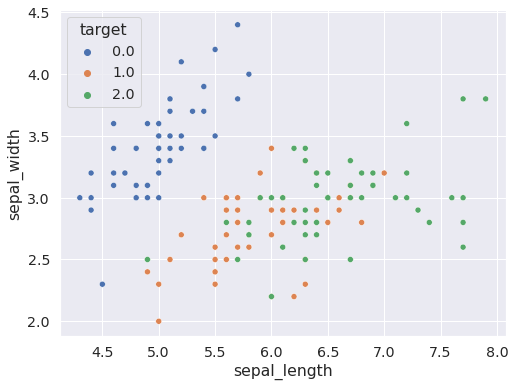

In [14]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot('sepal_length', 'sepal_width', hue='target', data=df, legend='full', palette=sns.color_palette()[:3])

In [15]:
df['target'].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

Przygotowanie danych do modelu

In [19]:
data = df.copy()
data = data[['sepal_length', 'sepal_width', 'target']]
target = data.pop('target')

data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [18]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [20]:
data = data.values

In [21]:
target = target.values.astype('int16')

Budowanie modelu klasyfikatora

In [24]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1)
classifier.fit(data, target)

DecisionTreeClassifier(max_depth=1)

Wykreślanie granic decyzyjnych


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


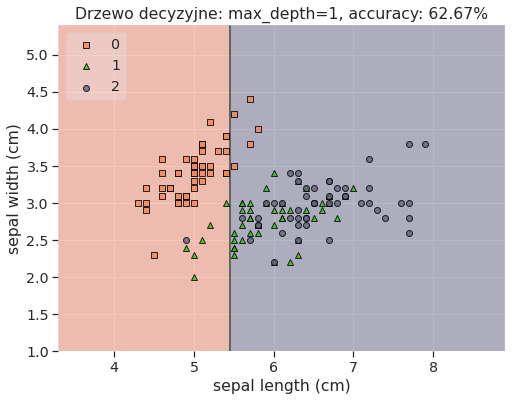

In [25]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(data, target)

plt.figure(figsize=(8, 6))
plot_decision_regions(data, target, classifier, legend=2, colors=colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%')
plt.show()

Graf drzewa decyzyjnego

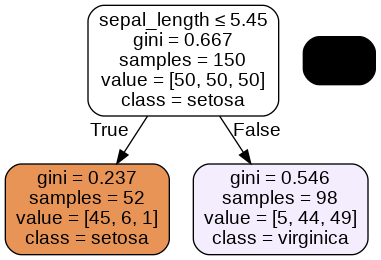

In [28]:
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus

dot_data = StringIO()
export_graphviz(classifier,
                out_file=dot_data,
                feature_names=feature_names[:2],
                class_names=target_names,
                filled=True, 
                rounded=True,
                special_characters=True
                )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')

Image(graph.create_png(), width=600)

Budowa funkcji dla modelu drzewa decyzyjnego

In [29]:
def make_decision_tree(max_depth=1):

    #train model
    classifier = DecisionTreeClassifier(max_depth=max_depth)
    classifier.fit(data, target)

    #export tree graph
    dot_data = StringIO()
    export_graphviz(classifier,
                out_file=dot_data,
                feature_names=feature_names[:2],
                class_names=target_names,
                filled=True, 
                rounded=True,
                special_characters=True
                )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    #calculate accuracy
    acc = classifier.score(data, target)

    #drawing decision boundaries
    colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
    plt.figure(figsize=(8, 6))
    plot_decision_regions(data, target, classifier, legend=2, colors=colors)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.title(f'Drzewo decyzyjne: max_depth= {max_depth}, accuracy: {acc * 100:.2f}%')
    plt.show()

    return Image(graph.create_png(), width=200+max_depth*120)



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


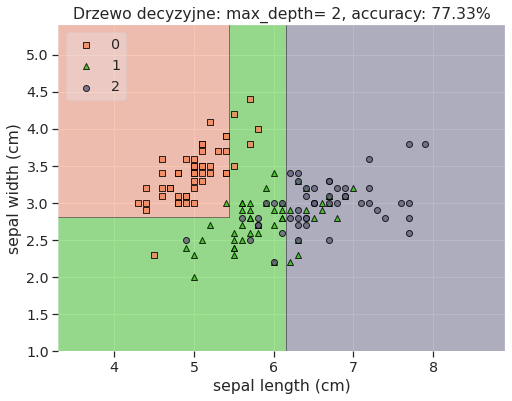

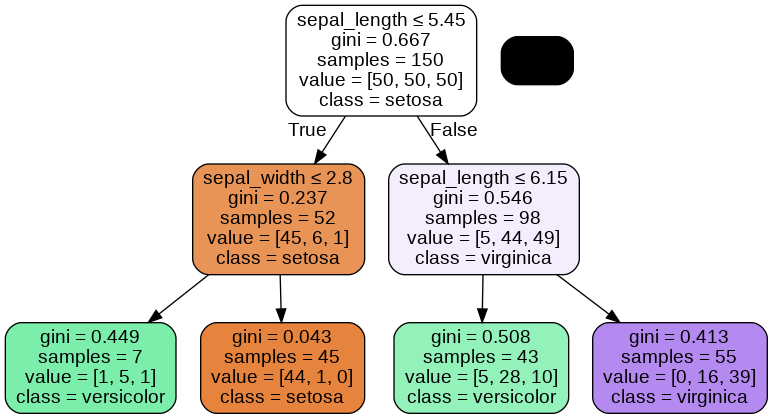

In [30]:
make_decision_tree(2)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


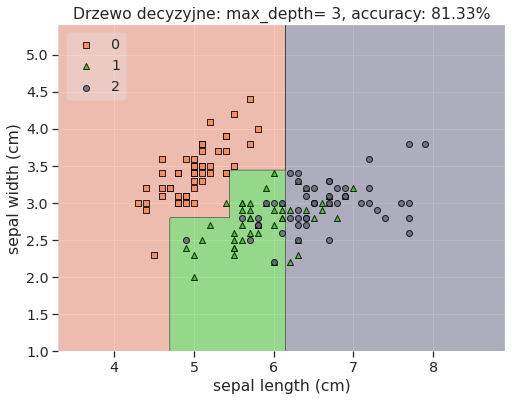

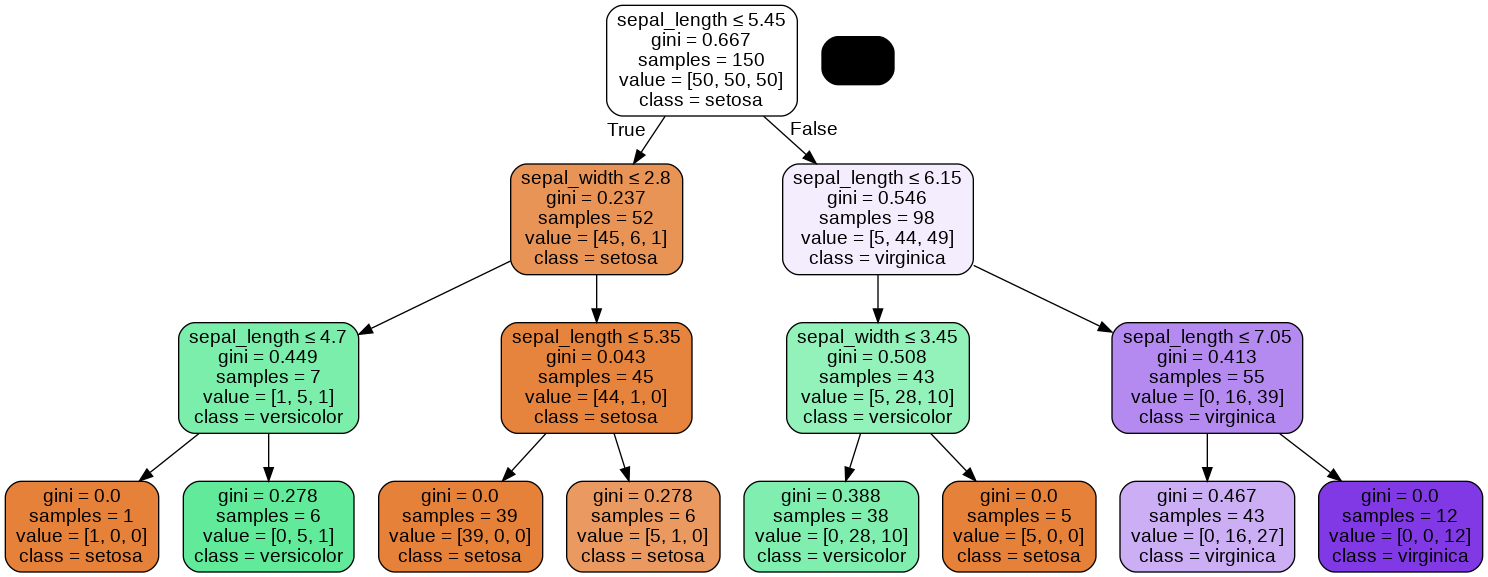

In [31]:
make_decision_tree(3)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


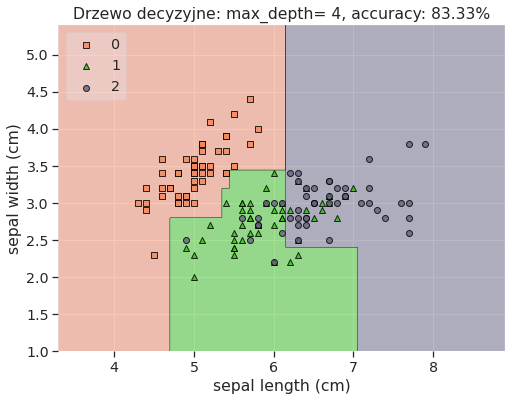

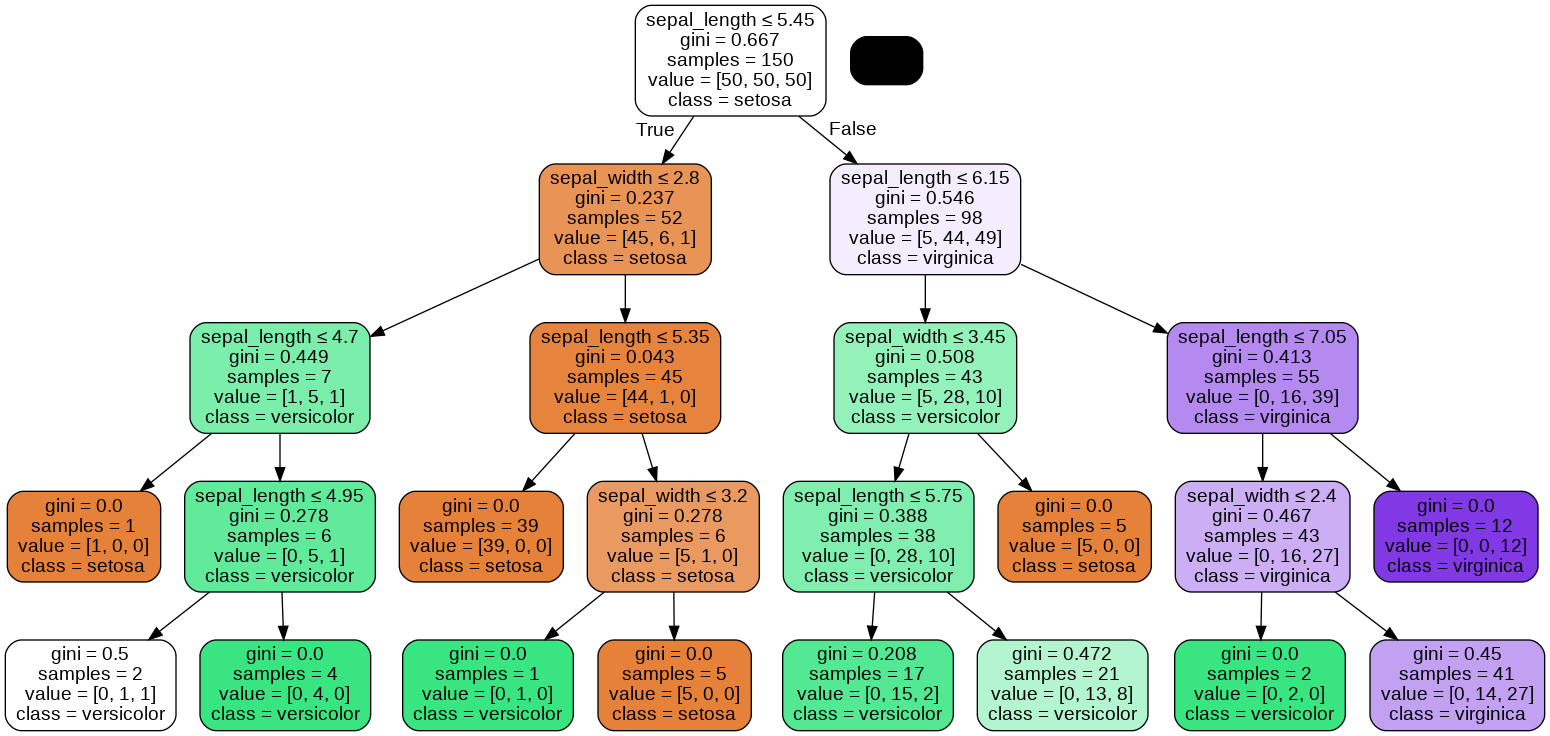

In [32]:
make_decision_tree(4)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


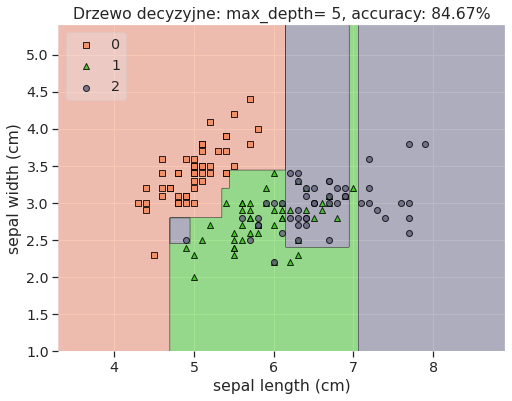

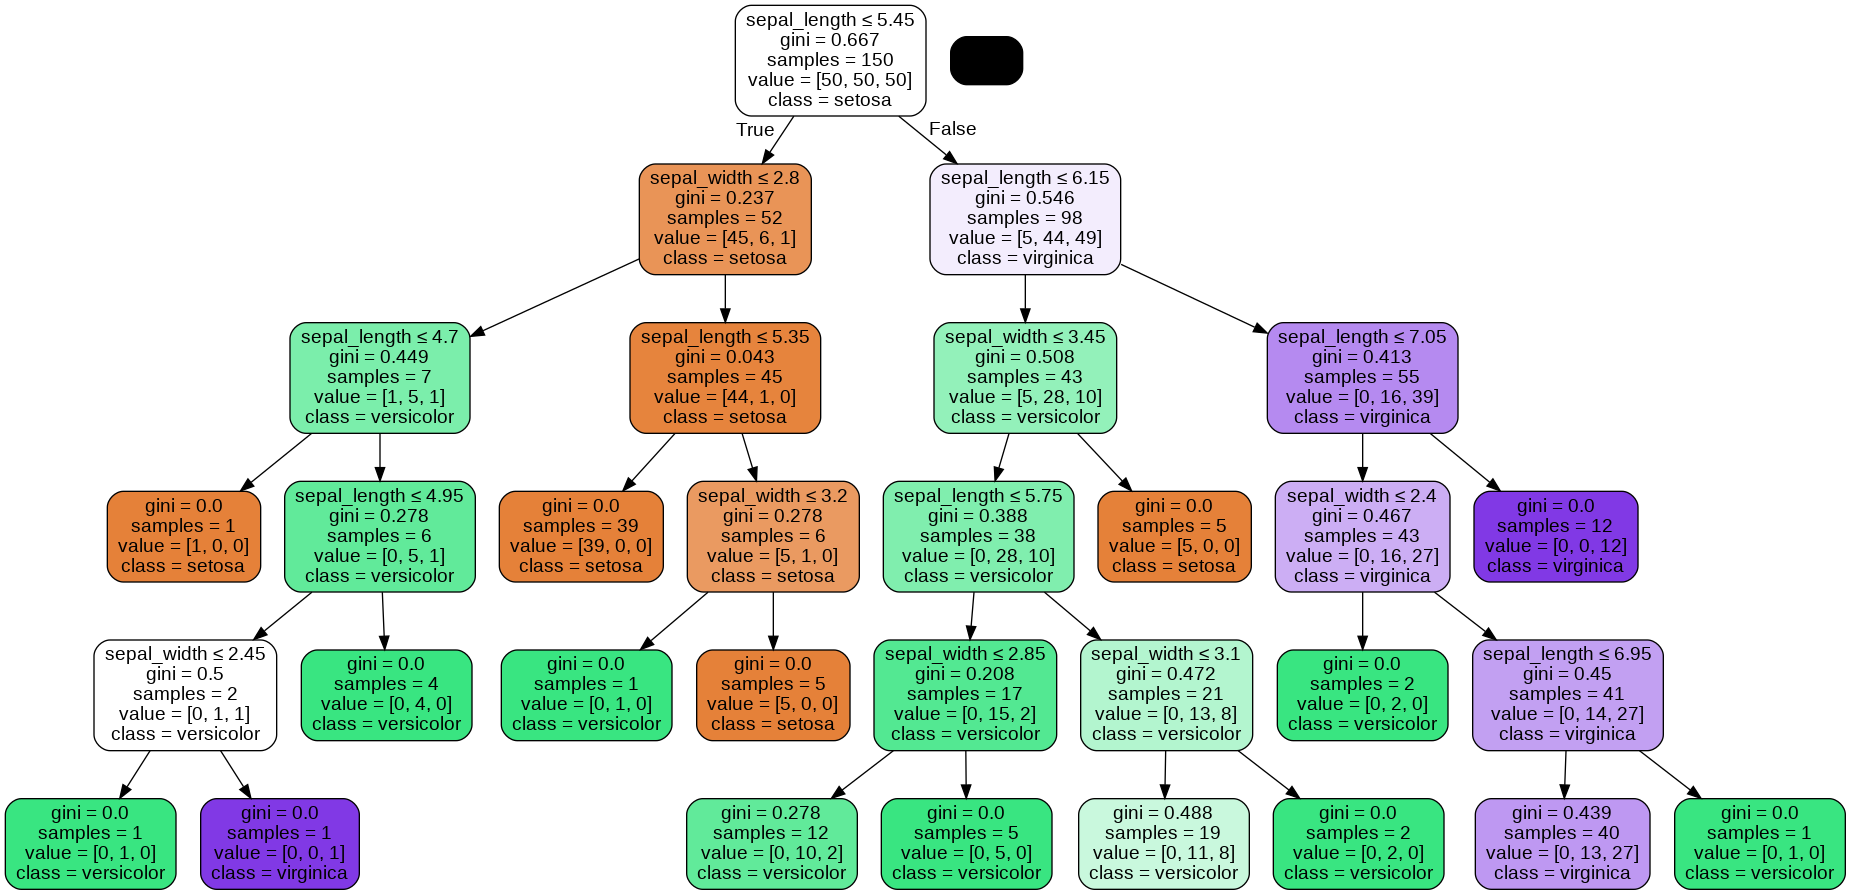

In [33]:
make_decision_tree(5)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


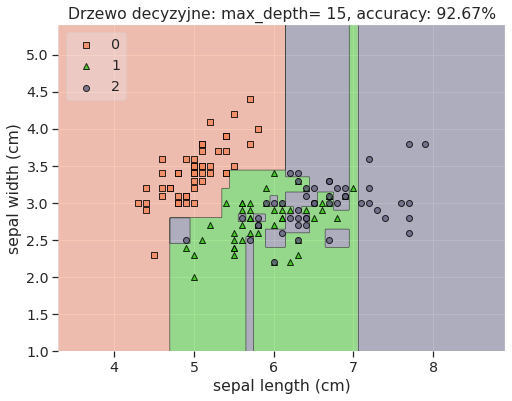

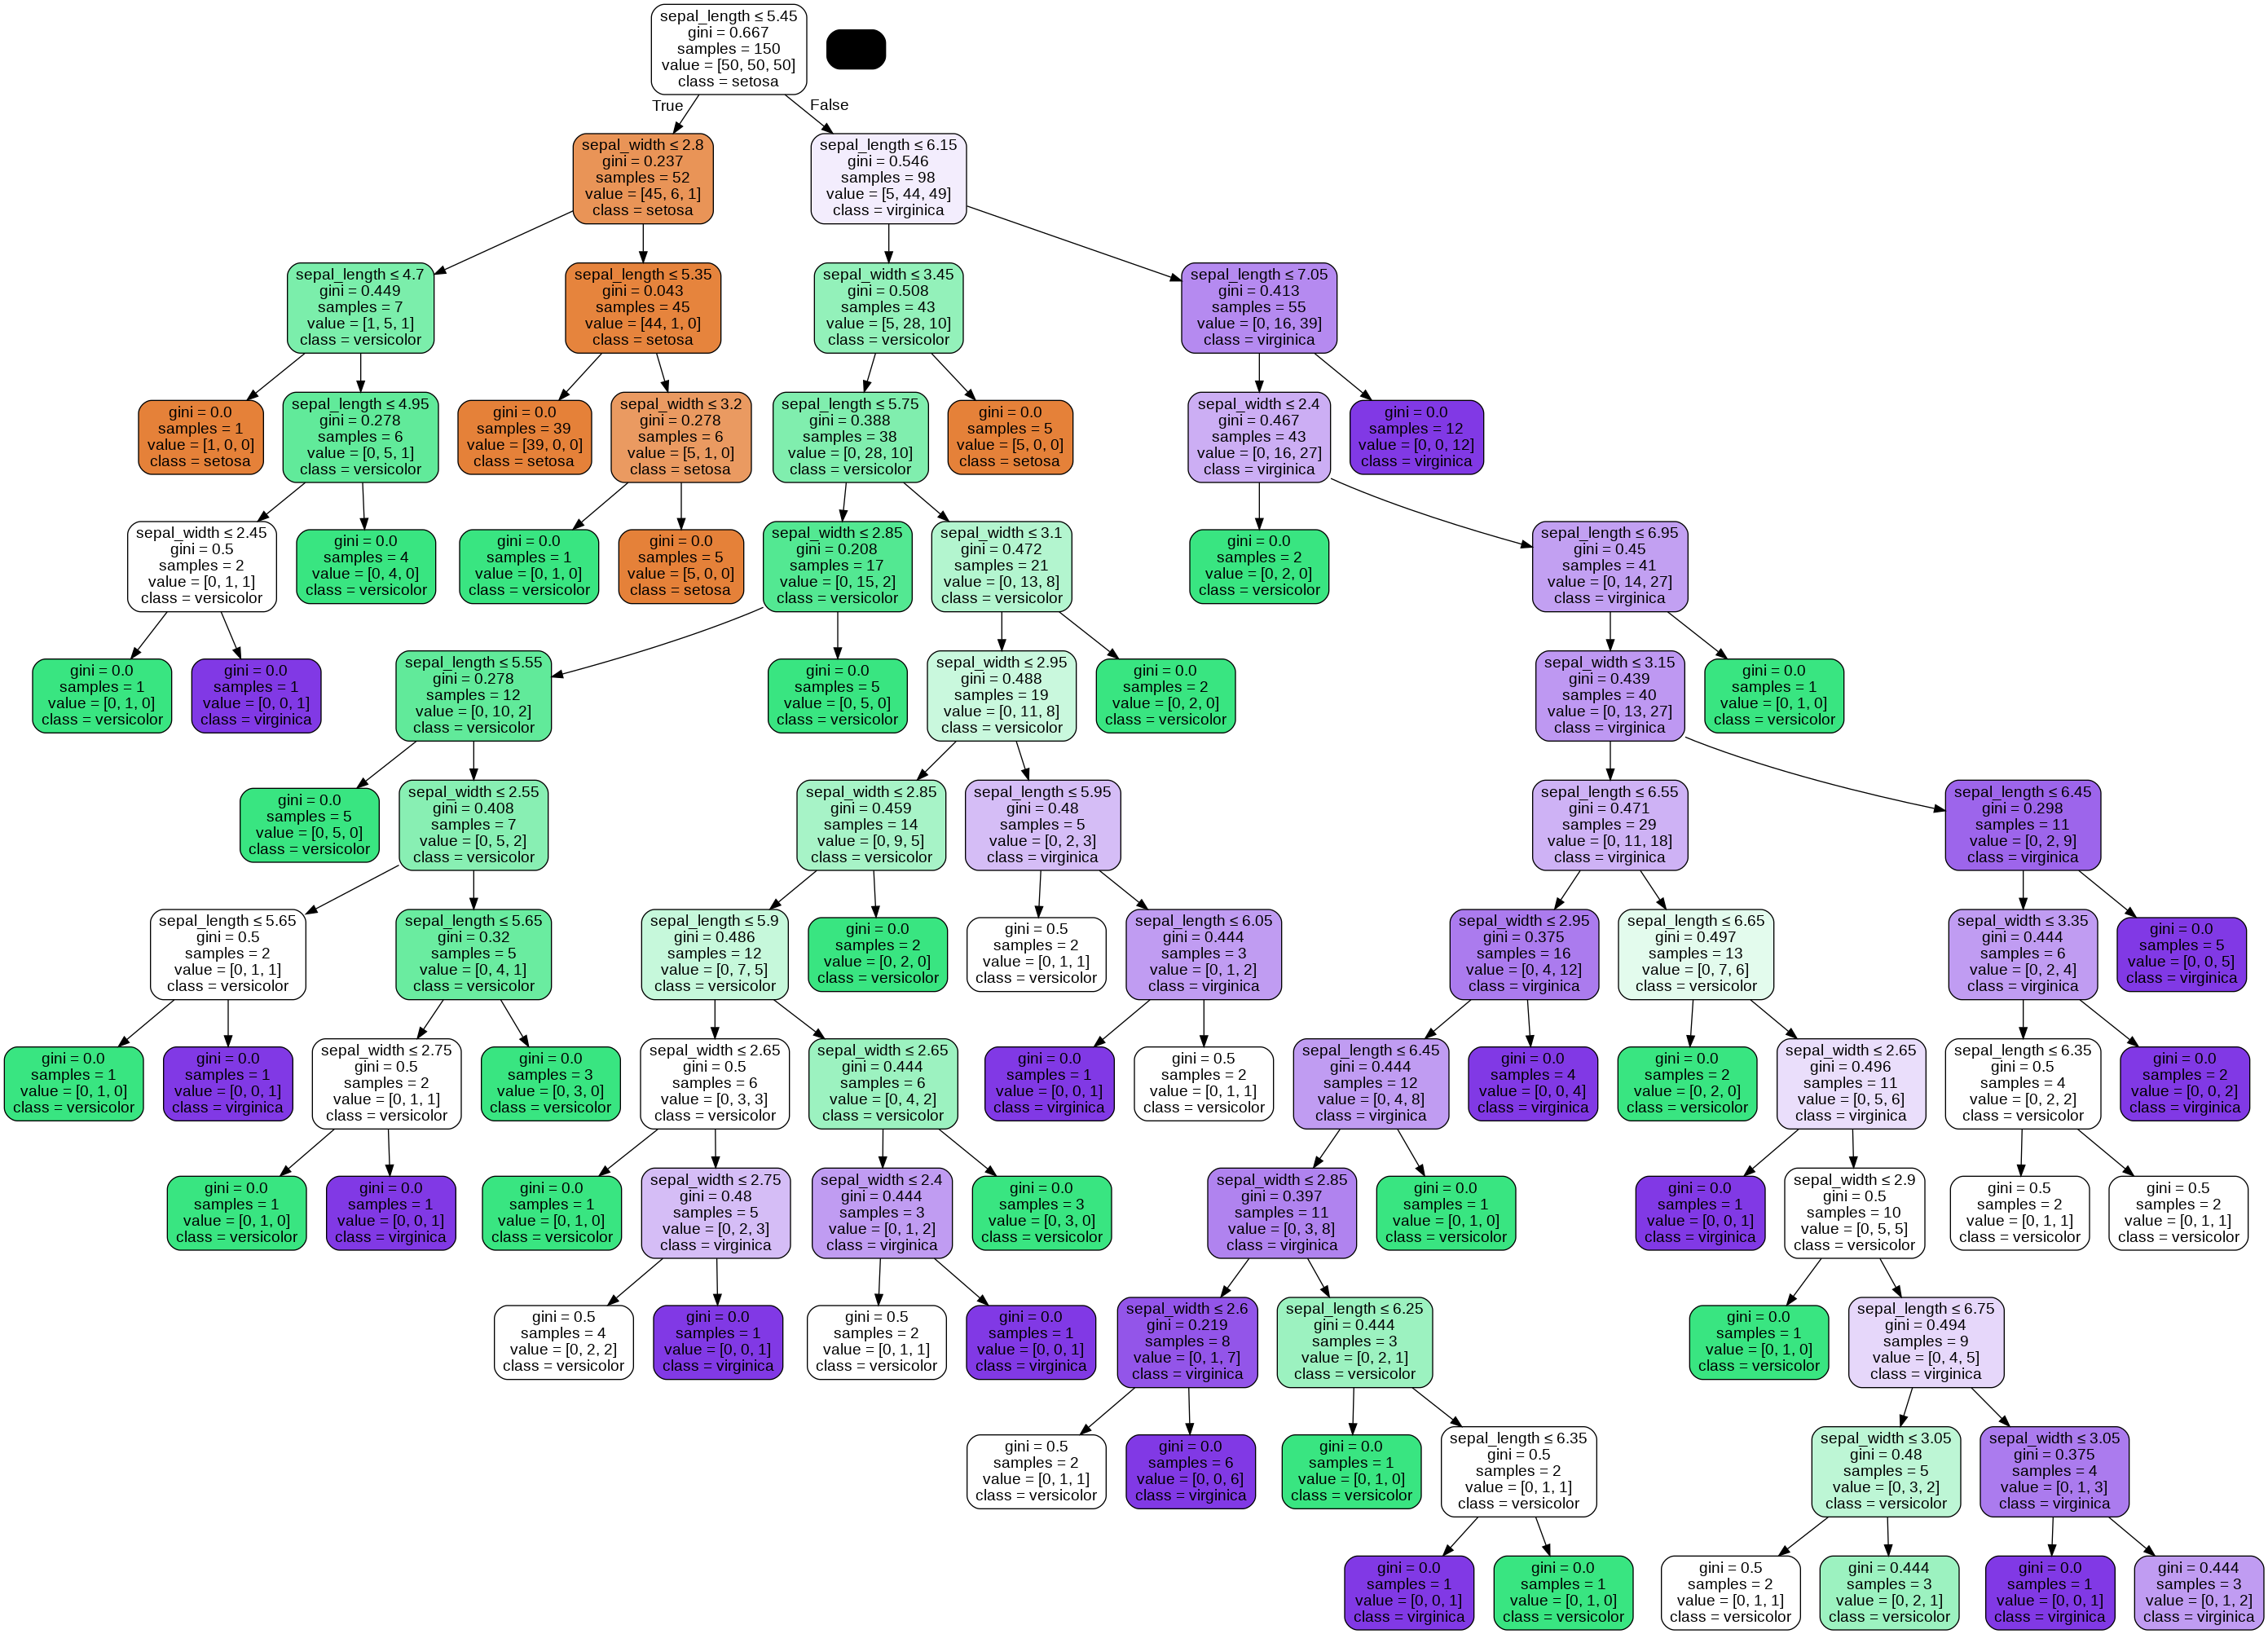

In [34]:
make_decision_tree(15)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


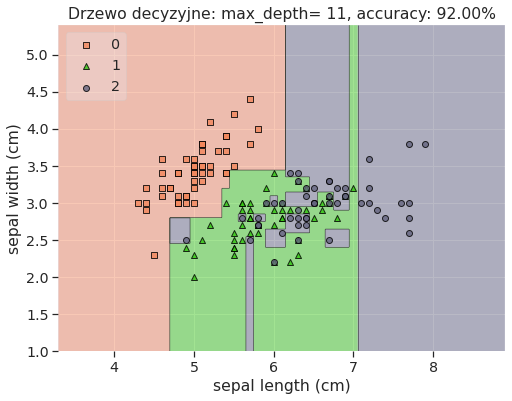

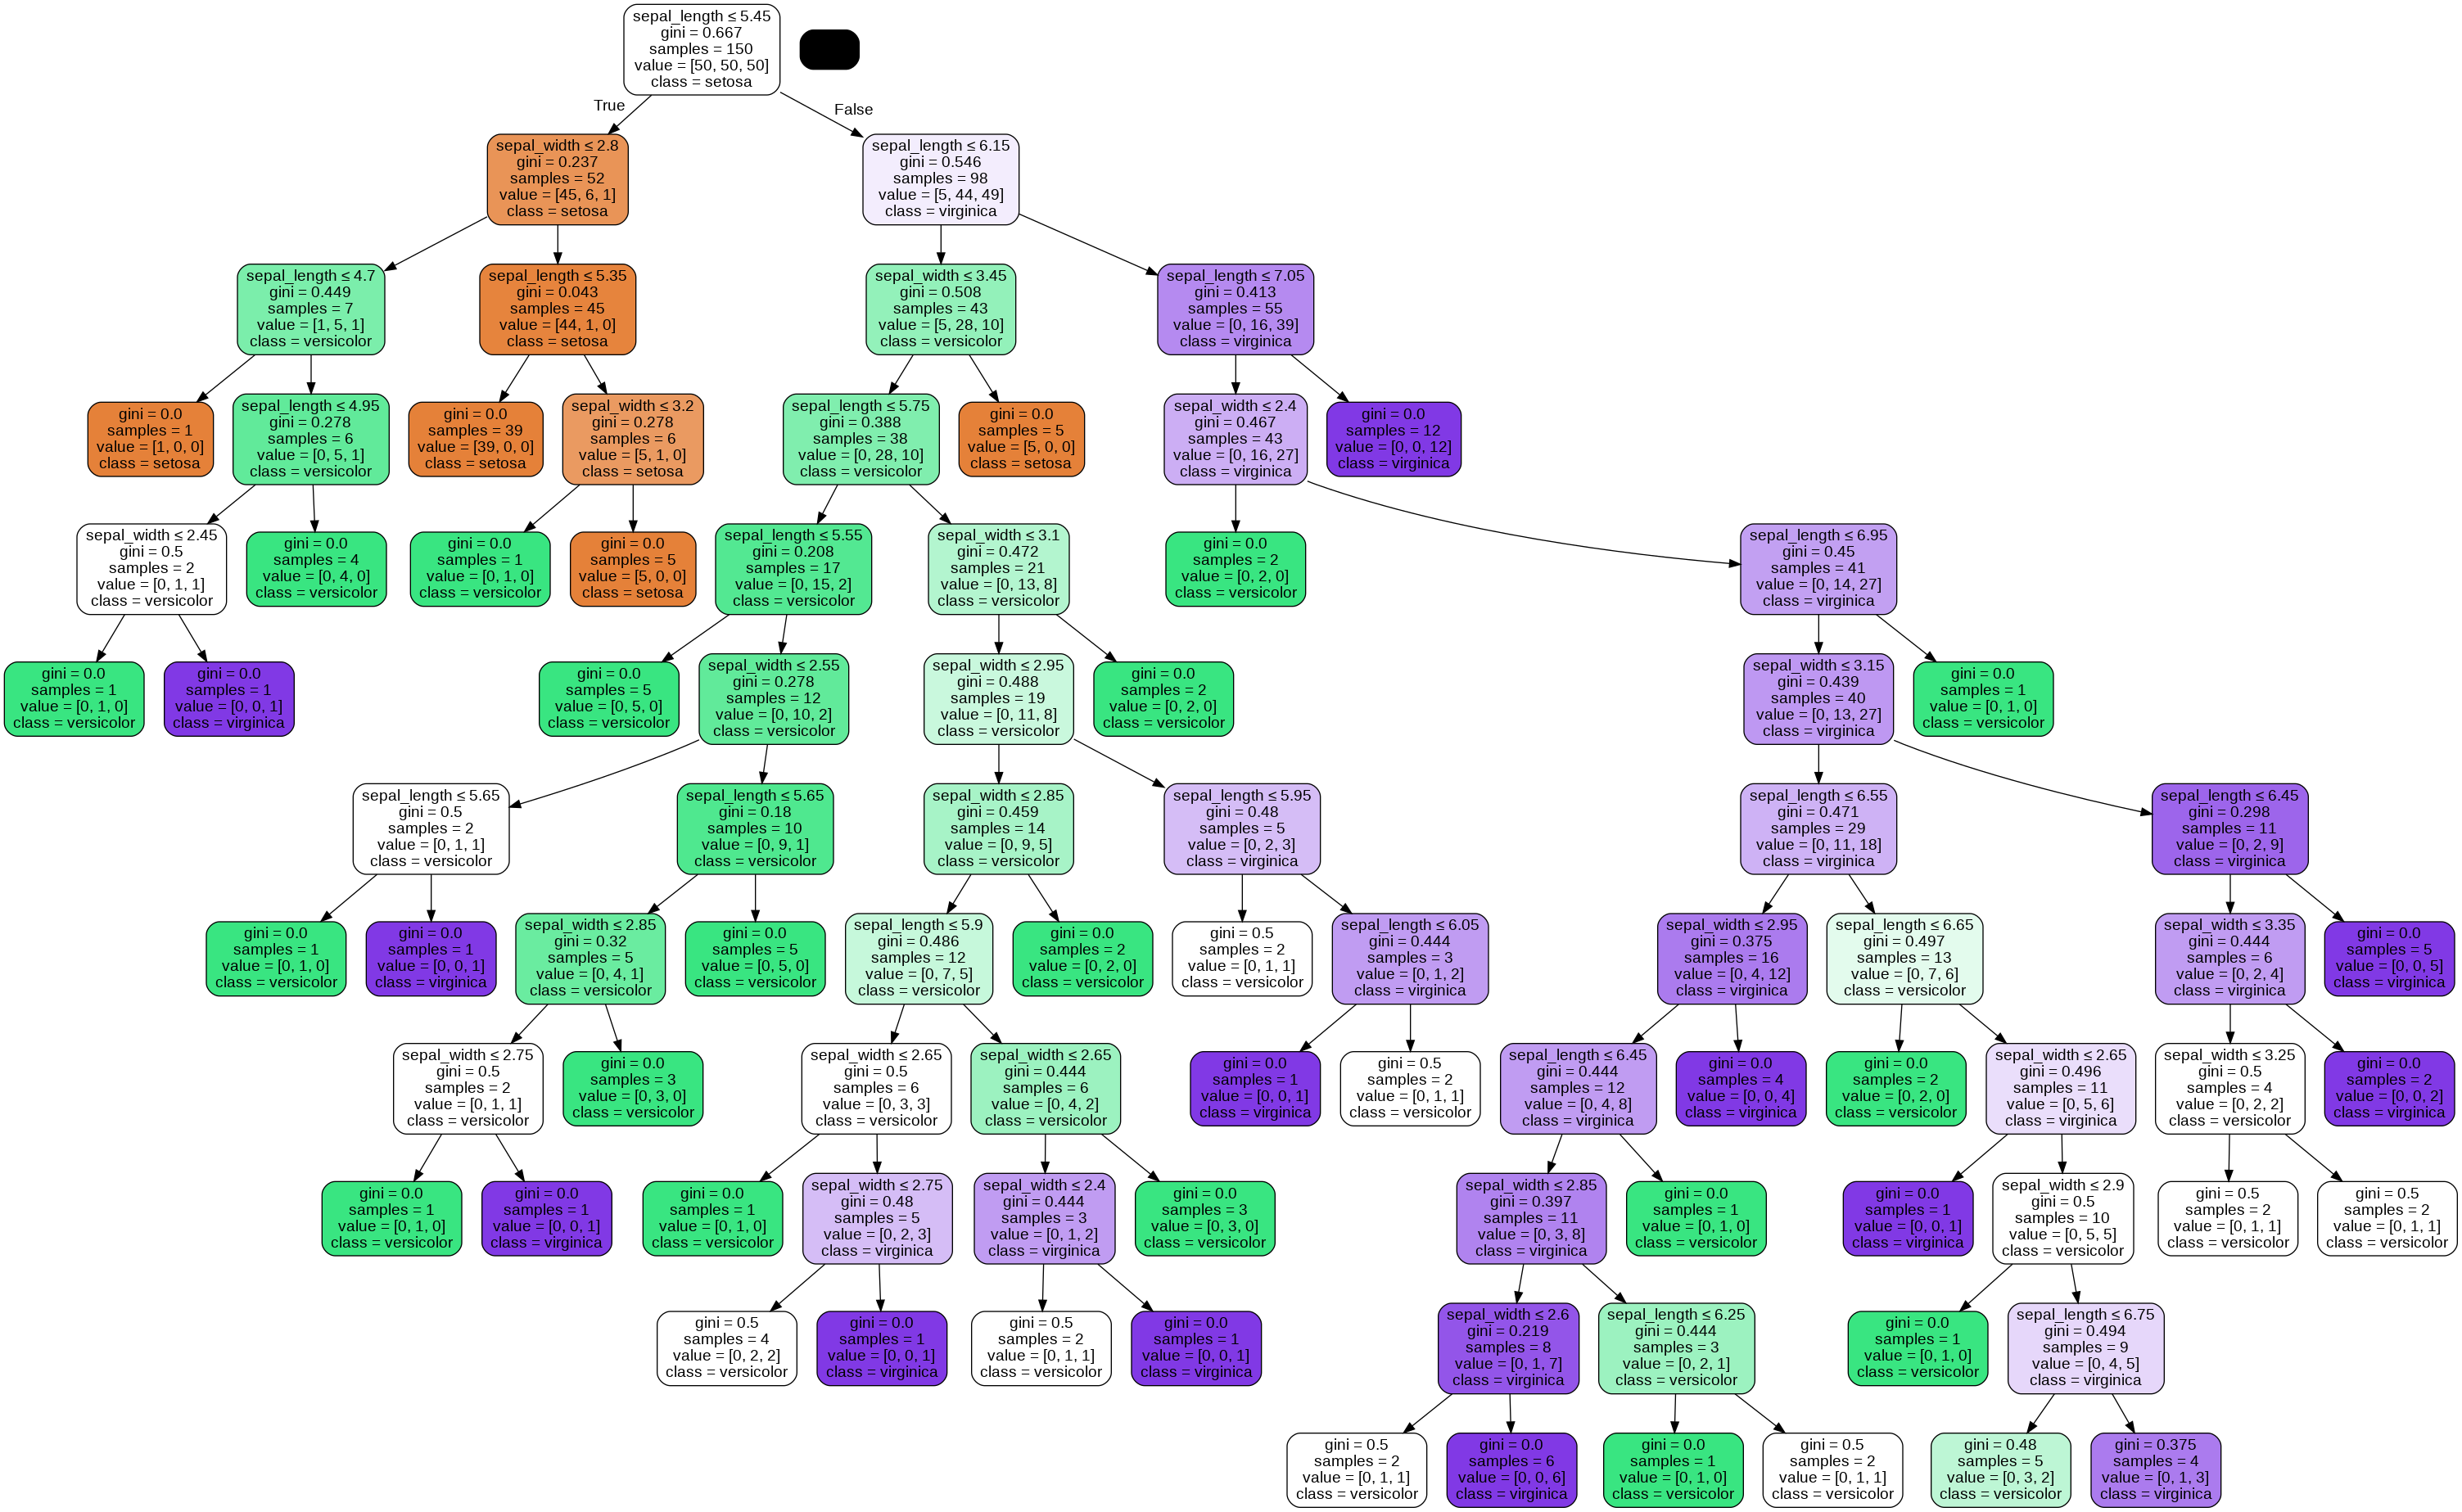

In [35]:
make_decision_tree(11)